[array([0.001     , 0.00125893, 0.00158489, 0.00199526, 0.00251189,
       0.00316228, 0.00398107, 0.00501187, 0.00630957, 0.00794328,
       0.01      , 0.01258925, 0.01584893, 0.01995262, 0.02511886,
       0.03162278, 0.03981072, 0.05011872, 0.06309573, 0.07943282,
       0.1       , 0.12589254, 0.15848932, 0.19952623, 0.25118864,
       0.31622777, 0.39810717, 0.50118723, 0.63095734, 0.79432823,
       1.        ])]


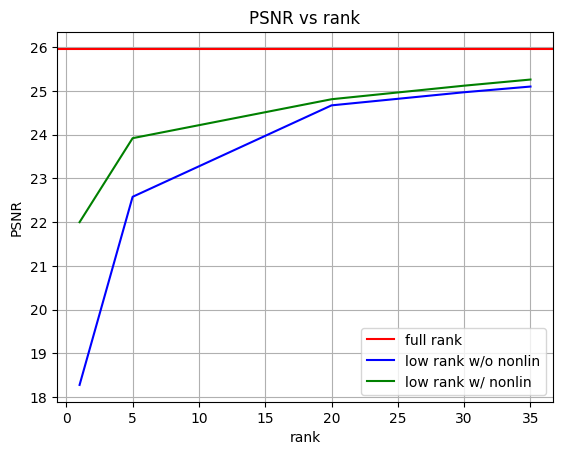

ValueError: x and y must have same first dimension, but have shapes (5,) and (31,)

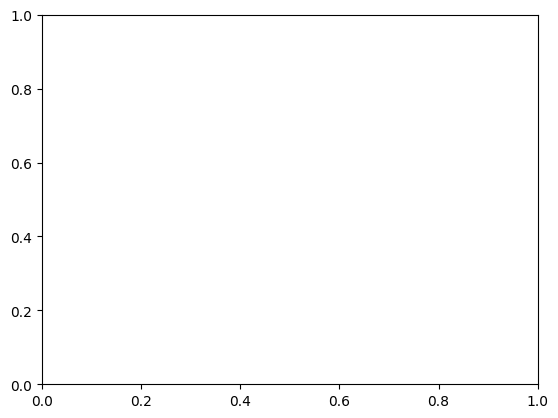

In [1]:
import torch
import torch.nn as nn
import cuda_matmul
import math
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
def srank(A):
    U,S,V=torch.svd(A)
    return torch.sum((S/S.max())**2)


n = 256
k = 1
w = 1
A = torch.empty(n,k)
B = torch.empty(k,n)
nn.init.kaiming_uniform_(A,a=math.sqrt(5))
nn.init.kaiming_uniform_(B,a=math.sqrt(5))
# C = cuda_matmul.matmul_cuda(A.cuda(),B.cuda(),100,16)


# plt.hist(A.flatten().cpu().detach().numpy())
# plt.show()
# print(srank(A))
# data1 = torch.load('results/fox/naive/rank_1/num_layers_8/psnr.pth')
# data2 = torch.load('results/fox/rank_1/num_layers_8/psnr.pth')
idx = []
for i in [np.logspace(-3,0,num=31)]:
    idx.append(i)
print(idx)
idx = np.logspace(-3,0,num=31)
#full
data=[23.66,24.71,25.21,25.58,25,24.78,25.26,24.96]
data=[18.28,22.58,24.67,24.97,25.1]
data1=[22,23.92,24.81,25.12,25.26]
idx = [1,5,20,30,35]

plt.axhline(y=25.96, color='red', label='full rank')
plt.plot(idx,data,color='blue', label='low rank w/o nonlin')
plt.plot(idx,data1,color='green', label='low rank w/ nonlin')
# plt.ylim(10,27)
plt.title('PSNR vs rank')
plt.xlabel('rank')
plt.ylabel('PSNR')
plt.grid()
plt.legend()
plt.show()

#rank 1 
# data1 = [20.87, 21.23, 21.35,21.36,21.41, 21.30,21.33,21.23]
# data2 = [18.95,17.79,18.33,17.88,18.99,15.61,18.59,18.09]
#rank 2
# data1 = [21.43,22.03,22.22,22.37,22.10,22.14,21.95,22.06]
# data2 = [20.61,20.27,20.06,20.17,20.16,19.91,19.86,19.86]
#rank 5
# data2 = [21.94,22.41,22.93,23,22.88,22.87,22.7,22.68]
# data1 = [21.89,22.60,23.17,23.32,23.28,23.05,22.72,22.74]
#rank 20
# data2 = [23.09,24.03,24.22,24.47,24.66,24.8,25.02,24.91]
# data1 =[22.37, 23.82, 24.73, 24.71, 24.73,24.96,24.72,24.86]


#log
data1=[12.14,11.96,12.14,12.08,13.36,18.46,19.65,20.3,20.37,20.65,20.98,21.22,21.17,21.27,21.36,21.36,21.4,21.46,21.35,21.26,21.12,21,20.72,20.7,20.39,20.03,19.25,18.51,18.30,18.18,16.99]
data2=[17.39,12.64,19.41,13.05,14.05,12.74,19.58,12.85,15.88,18.72,17.02,15.34,18.66,18.66,18.06,17.88,18.79,17.72,17.65,17.38,16.94,17.06,17.12,16.91,16.39,16.3,15.91,16.04,15.8,15.73,15.66]
data3=[12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,21.14,20.95,20.99,20.95,21.16,20.94,21.06,20.97,21.13,21.16,21.33,21.28,21.42,21.32,21.27,21.16]
data4 = [12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.14,12.25,12.16,14.1,15.26,14.58,12.94,15.8,15.76,15.3,14.94,16.01,15.17,15.06,15.03,14.95,15.07,14.37,14.24,15,14.52,15.04,14.77]
plt.plot(idx,data3,color='red',label='sin(w*AB)')
plt.plot(idx,data4,color='green',label='AB')
plt.xlabel('sigma')
plt.ylabel('PSNR')
plt.title('w/ BN PSNR vs sigma, when k = 1')
plt.grid()
plt.xscale('log')
plt.legend()

# plt.plot(idx,data,color='red', label='full rank')
# # plt.plot(idx,data2,color='green', label='AB')
# plt.ylim(10,26)
# plt.title('PSNR vs numbers of hidden layers, when full rank')
# plt.xlabel('numbers of hidden layers')
# plt.ylabel('PSNR')
# plt.legend()
# plt.show()

# plt.hist(B.flatten().cpu().detach().numpy())
# plt.show()
# print(srank(B))

# plt.hist((A@B).flatten().cpu().detach().numpy())
# plt.show()
# print(srank(A@B))

# plt.hist(C.cpu().detach().numpy().flatten())
# plt.show()
# print(srank(C))

# x = torch.sin(w*(A@B))/(torch.sin(w*(A@B)).max())/16
# plt.hist((x).cpu().detach().numpy().flatten())
# plt.show()
# print(srank(x))
# w=10
# x = torch.sin(w*(A@B))/(torch.sin(w*(A@B)).max())/16
# plt.hist((x).cpu().detach().numpy().flatten())
# plt.show()
# print(srank(x))
# w=40
# x = torch.sin(w*(A@B))/(torch.sin(w*(A@B)).max())/16
# plt.hist((x).cpu().detach().numpy().flatten())
# plt.show()
# print(srank(x))
# w=100
# x = torch.sin(w*(A@B))/(torch.sin(w*(A@B)).max())/16
# plt.hist((x).cpu().detach().numpy().flatten())
# plt.show()
# print(srank(x))
# w=200
# x = torch.sin(w*(A@B))/(torch.sin(w*(A@B)).max())/16
# plt.hist((x).cpu().detach().numpy().flatten())
# plt.show()
# print(srank(x))

# plt.hist((torch.sin(torch.sin(500*(A@B))/16)).cpu().detach().numpy().flatten())
# plt.show()
# print(srank(torch.sin(500*(A@B))/16))

# def spectral_init(weight, rank):

#     U, S, V = torch.svd(weight)
#     sqrtS = torch.diag(torch.sqrt(S[:rank]))
#     return torch.matmul(U[:,:rank], sqrtS), torch.matmul(V[:,:rank], sqrtS).T


# rank_k =20

# def topk_linf_loss(output, target, k=1):
#     errors = torch.abs(output - target)
#     topk_errors, _ = torch.topk(errors.view(-1), k)
#     return topk_errors[-1]

# # Define the model
# class MatrixOptimization(nn.Module):
#     def __init__(self,rank_k,B,C):
#         super(MatrixOptimization, self).__init__()
#         # Initialize B and C as learnable parameters
#         self.B = B
#         self.C = C

#     def forward(self):
#         return torch.matmul(self.B, self.C)


# def pretrain(rank_k):
#     # Create the model instance
#     #A = torch.nn.init.kaiming_normal_(torch.empty(256, 256), mode='fan_in', nonlinearity='relu')
#     A = torch.empty(256,256)
#     nn.init.kaiming_uniform_(A, a=math.sqrt(5))
#     plt.hist((A).flatten().cpu().detach().numpy())
#     plt.show()


#     B = nn.Parameter(torch.ones(256, rank_k))
#     C = nn.Parameter(torch.ones(rank_k, 256))

#     U, VT = spectral_init(A, rank_k)
#     B[:,:U.shape[1]] = U
#     C[:VT.shape[0],:] = VT

#     nn.init.kaiming_uniform_(B,a=math.sqrt(5))
#     nn.init.kaiming_uniform_(C,a=math.sqrt(5))
#     plt.hist((B).flatten().cpu().detach().numpy())
#     plt.show()
#     plt.hist((C).flatten().cpu().detach().numpy())
#     plt.show()
#     plt.hist((B@C).flatten().cpu().detach().numpy())
#     plt.show()
#     model = MatrixOptimization(rank_k,B,C)

#     # Define the loss function and the optimizer
#     optimizer = optim.Adam(model.parameters(), lr=0.001)

#     # Training loop
#     num_epochs = 50000
#     for epoch in range(num_epochs):
#         # Zero the gradients
#         optimizer.zero_grad()
        
#         # Forward pass
#         output = model()
#         loss1 = nn.MSELoss()(output,A)
#         # loss1 = topk_linf_loss(output,A,k=50000)
#         loss = loss1
#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()
        
#         # Print loss every 100 epochs
#         if (epoch+1) % 1000 == 0:
#             print(f'Epoch [{epoch+1}/{num_epochs}], Loss1: {loss1.item()}')
#     return model.B,model.C,A

# B,C,A = pretrain(20)
# plt.hist((B@C).flatten().cpu().detach().numpy())
# plt.show()
# plt.hist((A*16).flatten().cpu().detach().numpy())
# plt.show()


In [1]:
import torch
import torch.nn as nn
import cuda_matmul
import math
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
def srank(A):
    U,S,V=torch.svd(A)
    return torch.sum((S/S.max())**2)


n = 256
k = 1

for w in [1,20,30,40,50,300,500,1000]:
    A = torch.empty(n,k)
    B = torch.empty(k,n)
    nn.init.kaiming_uniform_(A,a=math.sqrt(5))
    nn.init.kaiming_uniform_(B,a=math.sqrt(5))
    C = A@B
    print('w:',w)
    rank = torch.linalg.matrix_rank(C)
    print('rank : ',rank)
    print('stable rank : ',srank(C))
    rank_sin = torch.linalg.matrix_rank(torch.sin(w*C))
    print('rank : ',rank_sin)
    print('stable rank : ',srank(torch.sin(w*C)))
print('the max frequency in the increasing region : ', np.pi/2/(C.max()) )


w: 1
rank :  tensor(1)
stable rank :  tensor(1.)
rank :  tensor(2)
stable rank :  tensor(1.)
w: 20
rank :  tensor(1)
stable rank :  tensor(1.)
rank :  tensor(3)
stable rank :  tensor(1.0004)
w: 30
rank :  tensor(1)
stable rank :  tensor(1.)
rank :  tensor(3)
stable rank :  tensor(1.0024)
w: 40
rank :  tensor(1)
stable rank :  tensor(1.)
rank :  tensor(3)
stable rank :  tensor(1.0071)
w: 50
rank :  tensor(1)
stable rank :  tensor(1.)
rank :  tensor(4)
stable rank :  tensor(1.0372)
w: 300
rank :  tensor(1)
stable rank :  tensor(1.)
rank :  tensor(10)
stable rank :  tensor(4.5080)
w: 500
rank :  tensor(1)
stable rank :  tensor(1.)
rank :  tensor(15)
stable rank :  tensor(7.0215)
w: 1000
rank :  tensor(1)
stable rank :  tensor(1.)
rank :  tensor(25)
stable rank :  tensor(10.4576)
the max frequency in the increasing region :  tensor(25.4164)


tensor([[5.0000e+00, 1.0000e-04, 1.0000e-04,  ..., 1.0000e-04, 1.0000e-04,
         1.0000e-04],
        [1.0000e-04, 5.0000e+00, 1.0000e-04,  ..., 1.0000e-04, 1.0000e-04,
         1.0000e-04],
        [1.0000e-04, 1.0000e-04, 5.0000e+00,  ..., 1.0000e-04, 1.0000e-04,
         1.0000e-04],
        ...,
        [1.0000e-04, 1.0000e-04, 1.0000e-04,  ..., 5.0000e+00, 1.0000e-04,
         1.0000e-04],
        [1.0000e-04, 1.0000e-04, 1.0000e-04,  ..., 1.0000e-04, 5.0000e+00,
         1.0000e-04],
        [1.0000e-04, 1.0000e-04, 1.0000e-04,  ..., 1.0000e-04, 1.0000e-04,
         5.0000e+00]])


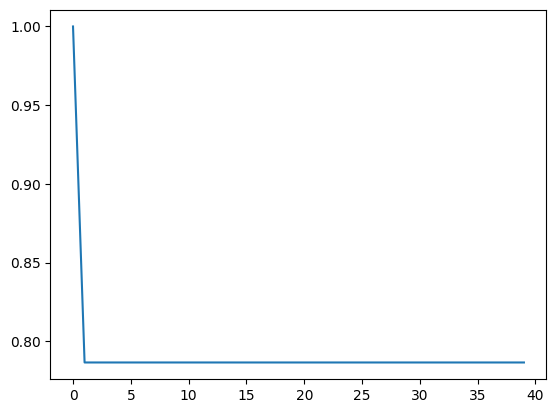

In [38]:
import torch
import torch.nn as nn
import math
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
def srank(A):
    U,S,V=torch.svd(A)
    return torch.sum(S**2)/(S.max()**2)
def sv(A):
    U,S,V=torch.svd(A)
    return S/S.max()

n = 40
k = 1
w = 1
A = torch.empty(n,k)
B = torch.empty(k,n)
nn.init.kaiming_uniform_(A,a=math.sqrt(5))
nn.init.kaiming_uniform_(B,a=math.sqrt(5))
nn.init.constant_(A,0.01)
nn.init.constant_(B,0.01)
C=A@B
for i in range(n):
    C[i][i]=+ 5
D=torch.eye(256)
plt.plot(sv(nn.Softmax(-1)(C)))
print(C)